# An Analysis of the Characters and Their Lines in The Office
## Trufl Intern Coding Assessment
### Memphis Lau

The Office is one of the most popular and beloved shows of all time. Its genius writing is able to combine comedic lines and unique abnormal characters to create a suprisingly heartfelt show. In this analysis, I will be exploring the different characters and their involvement in the show.

In [1]:
import string
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
lines = pd.read_csv(r"C:\Users\laume\trufl-intern-assessment\the_office_lines_scripts.csv")

## Main Characters

Throuhgout the 9 seasons of the office, 793 different characters have lines. It would be pointless to analyze each of them. For the purposes of this project, we will only look at those that have at least 1000 lines: these will be our "main characters". There are twelve: 

In [3]:
main = lines[lines.groupby('speaker')['speaker'].transform('size') > 1000].speaker.unique()

In [4]:
main_lines = lines.loc[lines.speaker.isin(main), ]

In [5]:
print(main)

['Michael' 'Jim' 'Pam' 'Dwight' 'Phyllis' 'Oscar' 'Angela' 'Kevin' 'Ryan'
 'Darryl' 'Andy' 'Erin']


## Distribution of Lines 

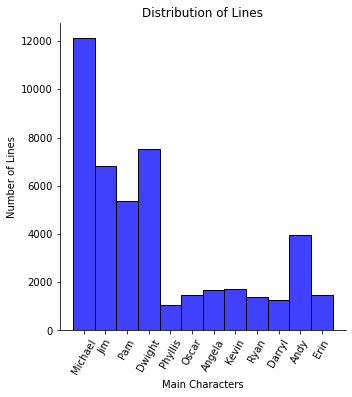

In [6]:
sns.displot(data = main_lines, x = "speaker", color = 'blue')
plt.xticks(rotation = 60)
plt.xlabel("Main Characters")
plt.ylabel("Number of Lines")
plt.title("Distribution of Lines")
plt.show()

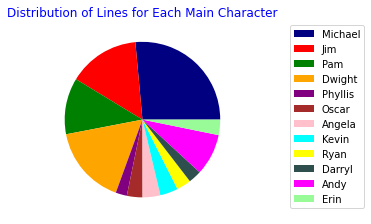

In [40]:
line_count = []
for character in main:
    line_count.append(np.count_nonzero(main_lines.speaker == character))
colors = ['navy', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'cyan', 'yellow', 'darkslategray', 'magenta', 'palegreen']
plt.pie(line_count, colors = colors)
plt.legend(main, bbox_to_anchor=(0.75,0.5), loc="center right", fontsize=10, 
           bbox_transform=plt.gcf().transFigure)
plt.subplots_adjust(left=0.0, bottom=0.1, right=0.45)
plt.title("Distribution of Lines for Each Main Character", color = 'blue')
plt.show()

### Episodes Without a Line

In [8]:
line_count = main_lines.groupby(['season', 'episode', 'speaker']).line_text.count()
character_line_count = line_count.unstack()
no_line = []
for i in np.arange(len(character_line_count.columns)):
    no_line.append(character_line_count[character_line_count.columns[i]].isna().sum())

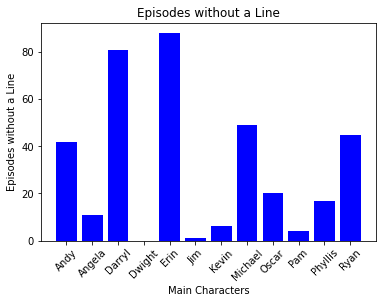

In [9]:
plt.bar(character_line_count.columns, no_line, color = 'blue')
plt.xticks(rotation = 45)
plt.xlabel("Main Characters")
plt.ylabel("Episodes without a Line")
plt.title("Episodes without a Line")
plt.show()

### Average Percent of Lines Per Episode

In [10]:
lines_per_episode = main_lines.groupby(['season', 'episode']).line_text.count()
percent_of_lines = line_count / lines_per_episode
percent_by_char = []
for character in main:
    percent_by_char.append(np.mean(percent_of_lines.loc[:,:,character]))

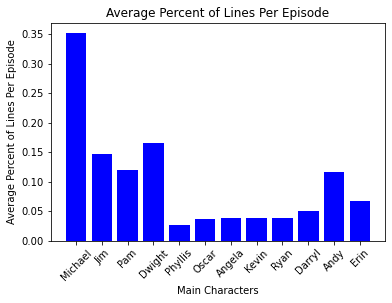

In [11]:
plt.bar(main, percent_by_char, color = 'blue')
plt.xticks(rotation = 45)
plt.xlabel("Main Characters")
plt.ylabel("Average Percent of Lines Per Episode")
plt.title("Average Percent of Lines Per Episode")
plt.show()

This is the same information displayed in the pie chart. We should explore the average percent of lines per main character per episode for EACH season.

In [12]:
# Function to create graphs for each season
def create_percent_graph(season):
    percent_vec = []
    for character in main:
        percent_vec.append(np.mean(percent_of_lines.loc[season,:,character]))
    plt.bar(main, percent_vec, color = 'blue')
    plt.xticks(rotation = 45, fontsize = 7)
    plt.xlabel("Main Characters", fontsize = 10)
    plt.ylabel("Average Percent of Lines Per Episode", fontsize = 7)
    plt.title("Season "  + str(season))

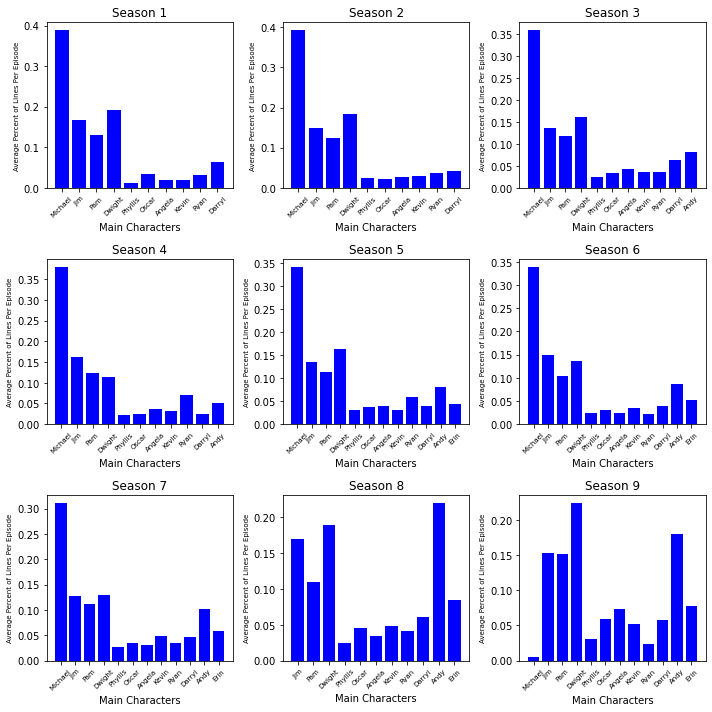

In [13]:
fig = plt.figure(figsize = (10,10))
for i in range(1,10):
    plt.subplot(3, 3, i)
    create_percent_graph(i)
fig.tight_layout()
plt.show()

### Appearances in Scenes

In [14]:
scenes = main_lines.groupby(['season', 'episode', 'scene']).speaker.unique()
character_scene_count = dict()
for character in main:
    character_scene_count[character] = 0
    for i in range(len(scenes)):
        if character in scenes.iloc[i]:
            character_scene_count[character] += 1

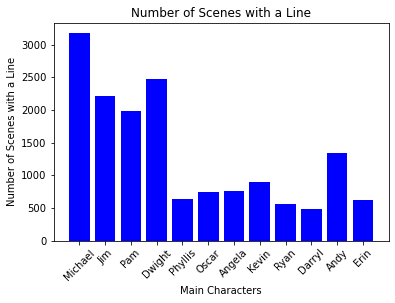

In [15]:
plt.bar(character_scene_count.keys(), character_scene_count.values(), color = 'blue')
plt.xticks(rotation = 45)
plt.xlabel("Main Characters", fontsize = 10)
plt.ylabel("Number of Scenes with a Line")
plt.title("Number of Scenes with a Line")
plt.show()

This graph very closely resembles that of the line count for each character, with the exception of Michael not being as much of an outlier. This means there are many scenes in which Michael has multiple lines.

### Line Count Across Time

In [16]:
# To create a time series, I will create a new column that labels the episodes chronologically through all seasons
episodes_per_season = lines.groupby(['season']).episode.nunique().cumsum()
lines['episode_total'] = lines['episode']
for i in range(2, lines.season.nunique() + 1):
    lines.loc[lines.season == i, 'episode_total'] += episodes_per_season[i-1]
main_lines = lines.loc[lines.speaker.isin(main), ]

In [17]:
#Function to create graphs for every character
def line_graph(character):
    cumulative_line_count = main_lines.groupby(['episode_total']).speaker.value_counts().loc[:,character].cumsum()
    plt.plot(cumulative_line_count, color = 'b')
    plt.title(character + "'s Cumulative Line Count")
    plt.xlabel("Episode")
    plt.ylabel("Cumulative Line Count")

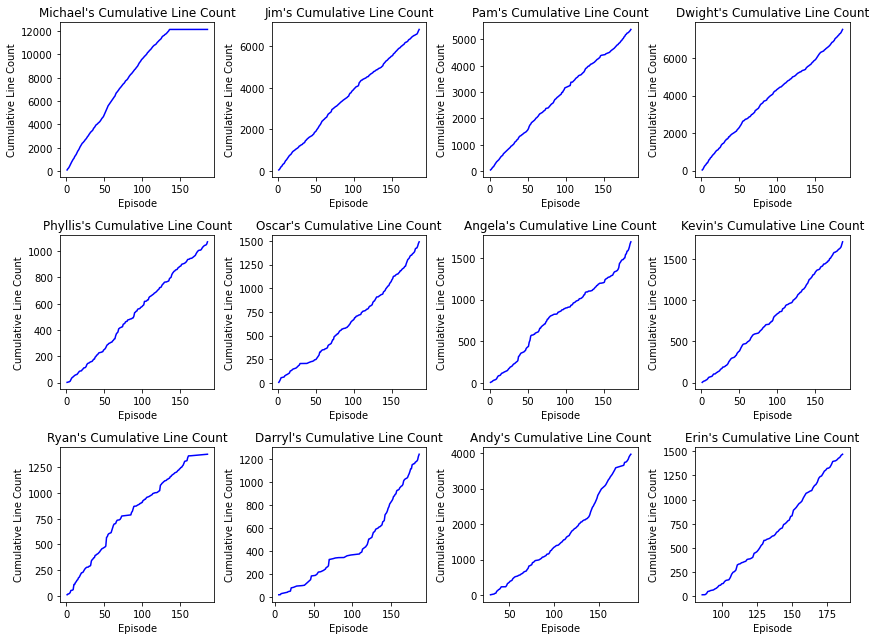

In [18]:
fig = plt.figure(figsize = (12, 9))
for i in range(1,13):
    plt.subplot(3,4,i)
    line_graph(main[i-1])
fig.tight_layout()
plt.show()

We see an expected increasing pattern for every main character as the show goes on. We also see that every main character's line growth rate increases towards the end of the show to make up for Michael and Ryan leaving the show in the late seasons. Now we will look at how each character's line count varies throughout the episodes to reveal more patterns.

In [19]:
def line_graph_2(character):
    cumulative_line_count = main_lines.groupby(['episode_total']).speaker.value_counts().loc[:,character]
    plt.plot(cumulative_line_count, color = 'b')
    plt.title(character + "'s Line Count Per Episode")
    plt.xlabel("Episodes")
    plt.ylabel("Line Count")

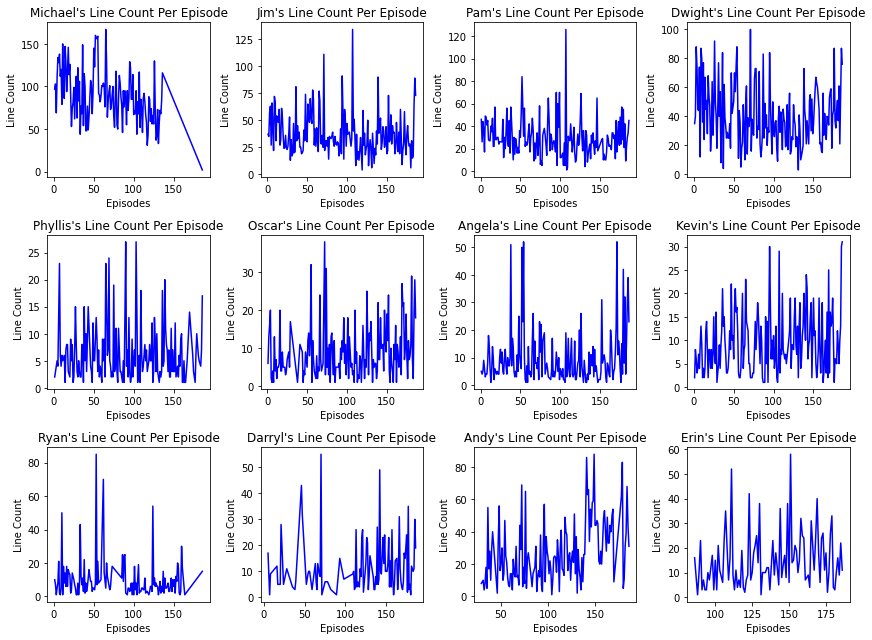

In [21]:
fig = plt.figure(figsize = (12, 9))
for i in range(1,13):
    plt.subplot(3,4,i)
    line_graph_2(main[i-1])
fig.tight_layout()
plt.show()

The main takeaway from these graphs is the variance that each character has. Most characters will have episodes with a relatively high amount of lines and then dip down to a relatively low number the very next episode. This points to the creativity and unpredictability of The Office. While Michael is the big main character, each of the other main characters have episodes where they shine and talk a lot. 

## Words
### Words Per Line

In [22]:
# Function to remove words that are inside of brackets
def get_words(words):
    for i in np.arange(len(words)):
        if '[' in words[i]:
            begin = i
            end = i
            for j in np.arange(len(words)-i):
                if ']' in words[i + j]:
                    end = i + j + 1
                    break
            words[begin:end] = '$' * (end - begin)        
    return [word for word in words if word != '$']

In [23]:
word_count = []
for row in np.arange(len(lines)):
    words = lines.iloc[row, 4].split()
    word_count.append(len(get_words(words)))
lines['word_count'] = word_count

In [24]:
main_lines = lines.loc[lines.speaker.isin(main), ]

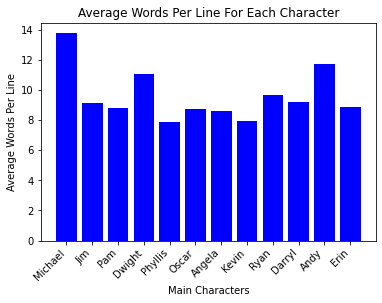

In [25]:
avg_words = []
for character in main:
    avg_words.append(np.mean(main_lines[main_lines.speaker == character].word_count))
plt.bar(main, avg_words, color = 'blue')
plt.xticks(rotation = 45, ha = 'right')
plt.xlabel("Main Characters")
plt.ylabel("Average Words Per Line")
plt.title("Average Words Per Line For Each Character")
plt.show()

In [26]:
main_lines[main_lines.word_count > 150]

,id,season,episode,scene,line_text,speaker,deleted,episode_total,word_count
888,889,1,3,48,I've really learned from the greats. The great...,Michael,True,3,264
3833,3834,2,5,49,"Yes. Actually, I have. I have been on a huntin...",Michael,True,11,161
4429,4430,2,7,42,I know we have to register as a consensual sex...,Michael,False,13,164
4446,4447,2,7,45,"Doctor David Friendly's Egg Yolk Diet. It's, ...",Michael,True,13,182
7874,7875,2,17,52,"Ah, look at me. I'm huge in Wilkes-Barre. Perf...",Michael,True,23,207
14954,14955,3,18,57,"Look, I am not a gazillionaire. I can't... I ...",Michael,False,46,203
15110,15111,3,19,20,"You may be asking yourself, 'What am I doing o...",Michael,False,47,159
16338,16339,3,22,55,[runs over after walking over fire coals] Hey!...,Pam,False,50,232
21899,21900,4,13,37,"Hold down the fort, I have to do something. [w...",Michael,False,64,155
25543,25544,5,8,29,What is my perfect crime? I break into Tiffan...,Dwight,False,73,154


Michael has the most average words per line, but this could be skewed by the fact that he has 11 out of the 13 lines of more than 150 words.

### Most Commmon Word Per Character

In [27]:
for character in main:
    char_lines = main_lines[main_lines.speaker == character].line_text
    total_words = dict()
    for line in char_lines:
        words = line.split()
        words = get_words(words)
        for word in words:
            if word in total_words:
                total_words[word] += 1
            else:
                total_words[word] = 0
    print(character, ':', sorted(total_words, key=total_words.get, reverse=True)[:5])

Michael : ['I', 'to', 'the', 'you', 'a']
Jim : ['I', 'you', 'to', 'the', 'a']
Pam : ['I', 'to', 'the', 'you', 'a']
Dwight : ['I', 'the', 'a', 'to', 'you']
Phyllis : ['I', 'the', 'you', 'a', 'to']
Oscar : ['I', 'a', 'the', 'to', 'you']
Angela : ['I', 'you', 'to', 'the', 'a']
Kevin : ['I', 'the', 'you', 'a', 'to']
Ryan : ['I', 'you', 'the', 'a', 'to']
Darryl : ['I', 'a', 'the', 'you', 'to']
Andy : ['I', 'the', 'a', 'to', 'you']
Erin : ['I', 'you', 'to', 'a', 'the']


As expected, everybody's most commmon words are just basic common English words. A more interesting analysis would be to look at each characters' most common >4 letter words

In [28]:
for character in main:
    char_lines = main_lines[main_lines.speaker == character].line_text
    total_words = dict()
    for line in char_lines:
        words = line.split()
        words = get_words(words)
        for word in words:
            word = word.translate(str.maketrans('', '', string.punctuation)) #remove punctuation from words
            if len(word) > 4:
                if word in total_words:
                    total_words[word] += 1
                else:
                    total_words[word] = 0
    print(character, ':', sorted(total_words, key=total_words.get, reverse=True)[:3])

Michael : ['going', 'right', 'about']
Jim : ['right', 'think', 'Dwight']
Pam : ['Michael', 'think', 'really']
Dwight : ['Michael', 'about', 'right']
Phyllis : ['Michael', 'think', 'Dwight']
Oscar : ['Michael', 'think', 'about']
Angela : ['Dwight', 'think', 'about']
Kevin : ['Michael', 'think', 'really']
Ryan : ['about', 'really', 'Michael']
Darryl : ['right', 'gonna', 'about']
Andy : ['about', 'right', 'think']
Erin : ['really', 'think', 'about']


Again, most of the words are common words, especially "think" and "about". It is interesting how often the name Michael appears, pointing to the fact that not only is he the main character and has the most lines, but he also gest referred to and talked about the most. 

To make this even more interesting, we will look at the each characters' most common words that are not in the top 100 most common words for all main characters.

In [29]:
#Finding the top 100 most common words
all_words = dict()
for line in main_lines.line_text:
    words = line.split()
    words = get_words(words)
    for word in words:
        word = word.translate(str.maketrans('', '', string.punctuation))
        if word in total_words:
            total_words[word] += 1
        else:
            total_words[word] = 0
most_common_words = (sorted(total_words, key=total_words.get, reverse=True)[:100])

In [30]:
for character in main:
    char_lines = main_lines[main_lines.speaker == character].line_text
    total_words = dict()
    for line in char_lines:
        words = line.split()
        words = get_words(words)
        for word in words:
            word = word.translate(str.maketrans('', '', string.punctuation)) #remove punctuation from words
            if word in total_words:
                total_words[word] += 1
            else:
                total_words[word] = 0
        for word in most_common_words:
            total_words.pop(word, None)
    print(character, ':', sorted(total_words, key=total_words.get, reverse=True)[:5])

Michael : ['people', 'very', 'because', 'All', 'little']
Jim : ['thats', 'mean', 'should', 'uh', 'All']
Pam : ['Um', 'mean', 'should', 'great', 'been']
Dwight : ['or', 'his', 'been', 'them', 'has']
Phyllis : ['Bob', 'mean', 'Andy', 'said', 'us']
Oscar : ['Angela', 'Why', 'Kevin', 'gay', 'Andy']
Angela : ['Kevin', 'party', 'them', 'Thank', 'God']
Kevin : ['Oscar', 'mean', 'she', 'then', 'didnt']
Ryan : ['Kelly', 'Ill', 'lot', 'man', 'something']
Darryl : ['man', 'Mike', 'na', 'Ill', 'yeah']
Andy : ['guys', 'mean', 'little', 'or', 'had']
Erin : ['Andy', 'guys', 'Sorry', 'sorry', 'then']


This now reveals a lot more. Michael's frequent use of the word "people" relates to his emphasis of business being about how you treat people. Some of the names here reveal close relationships (Phyllis' use of "Bob", Ryan's use of "Kelly", Erin's use of "Andy", Oscar and Kevin saying each other's name often). Other words reveal personalities and character traits (Angela's use of "God", Oscar's use of "gay", Erin's use of "sorry").

### That's What She Said

One of the most infamous lines from The Office is "that's what she said", a joke used by Michael and subsequently adopted by other characters. 

In [31]:
thats_what_she_said = np.array(0) #this is for the next part of the analysis
count = 0
for line in lines.line_text:
    words = line.split()
    for i in range(len(words) - 3):
        if words[i] == "that's" or words[i] == "That's":
            if words[(i+1):(i+3)] == ['what', 'she'] and (words[i+3] == 'said.' or words[i+3] == 'said,' or words[i+3] == 'said'):
                count += 1
                thats_what_she_said = np.append(thats_what_she_said, lines[lines.line_text == line].id) # for next part
count

27

There are 27 times that the phrase "that's what she said" appears. Let's look at a few examples.

In [32]:
np.unique(thats_what_she_said)

array([    0,  2545,  5325,  6322,  6353,  8872, 10904, 12594, 13337,
       14302, 14374, 15386, 17570, 18960, 20122, 20125, 20270, 20272,
       20283, 21481, 23150, 23911, 24197, 36371, 40587, 42260, 43115,
       54088], dtype=int64)

In [33]:
lines.iloc[2543:2547, 1:6]

,season,episode,scene,line_text,speaker
2543,2,2,24,"No, thanks. I'm good.",Jim
2544,2,2,24,That's what she said. Pam?,Michael
2545,2,2,24,Uh... my mother's coming.,Pam
2546,2,2,24,"That's what she sai [clears throat] Nope, but...",Michael


In this example in Season 2 Episode 2, we see Michael's first use of "That's what she said", using it in response to Jim saying he's good and Pam saying her mother is coming.

In [34]:
lines.iloc[6320:6323, 1:6]

,season,episode,scene,line_text,speaker
6320,2,12,33,Does the skin look red and swollen?,Doctor
6321,2,12,33,That's what she said.,Dwight
6322,2,12,33,"That's my joke, damnit Dwight.",Michael


Now 10 episodes later, Dwight says the line, with Michael complaining that it's his joke.

Here are a few other examples:

In [35]:
lines.iloc[14300:14304, 1:6]

,season,episode,scene,line_text,speaker
14300,3,17,9,Let's just blow this party off.,Jan
14301,3,17,9,That's what she said.,Michael
14302,3,17,9,Am I on speaker phone?,Jan
14303,3,17,9,"Uh, yes you are.",Michael


In [36]:
lines.iloc[36367:36371, 1:6]

,season,episode,scene,line_text,speaker
36367,6,18,9,Yes. All of 'em. Together. It's a conspiracy. ...,Darryl
36368,6,18,9,You don't get it.,Michael
36369,6,18,9,You need to get back on top.,Darryl
36370,6,18,9,That's what she said.,Michael


In [37]:
lines.iloc[40584:40587, 1:6]

,season,episode,scene,line_text,speaker
40584,7,8,29,You know what Erin you do have to.,Michael
40585,7,8,29,Michael! You are making this harder than it ha...,Gabe
40586,7,8,29,[grimacing] That's what she said. [leaves],Michael


## Deleted Lines

For this project, we have been considering all lines, deleted or not, as those lines are what the creators of the show intended for. All their words and lines should be considered whether or not NBC decided to remove them. Now, we will analyze the deletion of lines.

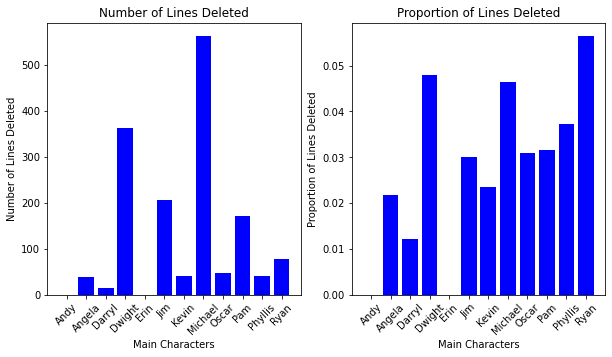

In [38]:
deleted = main_lines.groupby(['speaker']).deleted.value_counts()
deleted = deleted.unstack()
deleted = deleted.fillna(0)
deleted_prop = main_lines.groupby(['speaker']).deleted.value_counts(normalize = True)
deleted_prop = deleted_prop.unstack()
deleted_prop = deleted_prop.fillna(0)

plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
plt.bar(deleted.index, deleted[1], color = 'blue')
plt.xticks(rotation = 45)
plt.xlabel("Main Characters")
plt.ylabel("Number of Lines Deleted")
plt.title("Number of Lines Deleted")


plt.subplot(1, 2, 2)
plt.bar(deleted.index, deleted_prop[1], color = 'blue')
plt.xticks(rotation = 45)
plt.xlabel("Main Characters")
plt.ylabel("Proportion of Lines Deleted")
plt.title("Proportion of Lines Deleted")

plt.show()

This is interesting because, in my opinion, Ryan is one of the least developed characters out of our 12 main characters, and he has the highest proportion of lines deleted. However, the difference in proportions of lines deleted does not vary too much amongst the main characters, showing no bias for any particular character's lines.

This analysis aimed to take a deeper look into the distribution of lines and word patterns of the main characters in The Office. Overall, the data provides evidence towards the show's great screenwriting and character balance, main components in making it one of the most well-received shows of all time.